Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [84]:
NAME = "Lars Abbink, #2012129#"
COLLABORATORS = ""

---

Fill in the cell above to provide us with your name and student number, like

NAME = "Adam Smith, #student number#"

where you replace "#student number#" with your ... (very good!)

Unfortunately, you are not allowed to work with "COLLABORATORS" in this exam.

# exam September 21st, 2018

With this python part of the exam you can earn at max. 4 points.




In the first cell of the notebook, give us your name and student number in the way indicated above. 

Fill in the notebook (see below for code cells and text cells that you need to fill in).

If you look at the menus above (File, Edit, View etc.), there is one called "Cell". If you click on this, you can change the "Cell Type". Choose "Code" when you are typing python or R code. Choose "Markdown" when you are typing, well, markdown.

When you finish the notebook, make sure that you **save it with the output of your code included**. 

Then put it on github, e.g. by dragging it onto github (see instructions below). 

Finally, add a link to your README file with the name of this exam: "Exam September 21, 2018".



## Generating and plotting data

We start by importing the usual libraries.

In [85]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import optimize
%matplotlib inline

#### a) [0.5 point] Explain in words what the following code does. 

In [86]:
n_observations = 100
x = np.random.uniform(0,2,size=n_observations)
df = pd.DataFrame({'x': x})

YOUR ANSWER HERE: het maakt een uniforme grafiek met lowerbound 0 en uperbound 2, er zijn 100 random gegenereerde getallen (tussen 0 en 2 dus). De laatste regel maakt er een dataframe van met label x en alle getallen die gegenereerd zijn in een collom eronder.

Now we are going to add some columns to the dataframe `df`.

#### b) [0.5 points] Add two columns to the data frame: (i) column `y` where $y=3*x+5$ and (ii) column `z` where $z = (x-1)^2$.

In [87]:
# YOUR CODE HERE
df['y'] = 3*x+5
df['z'] = (x-1)**2
print(df)


           x          y         z
0   1.706939  10.120818  0.499763
1   0.485775   6.457326  0.264427
2   0.537734   6.613201  0.213690
3   0.598383   6.795148  0.161297
4   1.507657   9.522972  0.257716
5   1.874544  10.623632  0.764827
6   1.594863   9.784589  0.353862
7   0.400492   6.201475  0.359410
8   0.038074   5.114221  0.925302
9   1.747811  10.243434  0.559222
10  0.856875   7.570626  0.020485
11  0.504812   6.514435  0.245211
12  1.250563   8.751689  0.062782
13  1.252935   8.758804  0.063976
14  0.281469   5.844406  0.516287
15  0.126326   5.378978  0.763306
16  1.828453  10.485360  0.686335
17  1.421207   9.263621  0.177415
18  0.677111   7.031333  0.104257
19  1.154396   8.463188  0.023838
20  0.198960   5.596881  0.641665
21  0.859021   7.577062  0.019875
22  1.726568  10.179703  0.527901
23  1.240055   8.720165  0.057626
24  0.750534   7.251601  0.062233
25  0.527628   6.582884  0.223135
26  1.521341   9.564024  0.271797
27  1.909390  10.728171  0.826991
28  1.018495  

#### c) [0.5 point] Calculate the means and standard deviations for `x` and `y`. 

[hint: you can do this with one command or with four separate commands]

In [88]:
# YOUR CODE HERE
print(np.std(x))   #standard deviation x
print(np.mean(x))  #mean x
print(np.std(df['y'])) #standard deviation y
print(np.mean(df['y'])) #mean y



0.5541339360416951
0.9537175153407011
1.662401808125085
7.8611525460221


#### d) [0.5 points] Use your knowledge of statistics to explain the relations (i) between the means of `x` and `y` and (ii) between the standard deviations of `x` and `y`.

(i) de mean is de som van alle metingen gedeeld door het aantal metingen. Omdat bij y: x * 3 + 5 gebruikt is, is de mean van y ook 3 * mean(x) + 5

(ii)omdat de standard deviation voor een uniforme distributie gelijk is aan: (b-a)/(12)^0,5, en bij x b gelijk is aan 2 en a gelijk is aan 0. Is de standard diviation hier normaal gelijk aan 0.5773502 en dat ligt dicht bij de gegevens die hier uit komen. Omdat de formule x*3 + 5 word gebruikt verschuiven de grensen van a en b, die worden nu 11 en 5. ligt deze standard diviation ongeveer bij de 1.732050 ligt wat ook het geval is.

#### e) [1 point] Plot a histogram of `x` with fractions (not absolute numbers) on the vertical axis. Add the label $x$ to the horizontal axis.

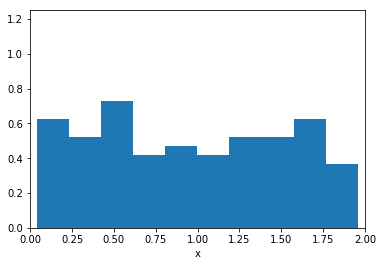

In [95]:
histogram = plt.hist(x, 10, density = True) #maakt gebruik van gegevens van x, heeft 10 balken, density = True nu heb ik het zo gemaakt dat de verticale ax fracties aan geeft.
plt.xlabel('x')           #geeft een naam aan de x as
plt.axis([0,2,0,1.25])      #zo zitten er geen witte randen aan de linker en rechter kant
plt.show()                #zo laat je de grafiek zien

#### f) [0.5 points] Make a scatter plot of `y` vs `z` with the label $y$ on the horizontal axis and the label $z$ on the vertical axis.

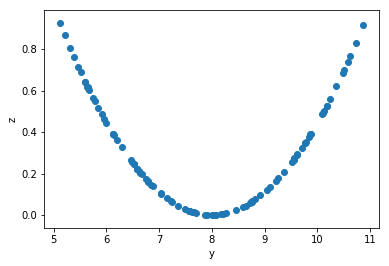

In [93]:
scatterplot = plt.scatter(df['y'],df['z']) #hier maak ik een scatterplot waar ik y tegen z uit zet
plt.xlabel('y')                            #hier geef ik een naam aan de x as
plt.ylabel('z')                            #hier geef ik een naam aan de y as
plt.show()                                 #hier laat ik de grafiek zien

This relation looks rather "perfect". We want to make a "noisy" version of this graph.

#### g) [0.5 points] Create a variable `z2` equal to `z` but with some "noise" added to it. That is, add a random variable (vector) with mean 0 to `z` to get `z2`. Then plot `y` against `z2`. Adjust the standard deviation of the "noise" variable such that the shape of the figure under f) can still be recognized but not perfectly.

[hint: under a) you have seen the library that contains functions to create a "noisy variable"]

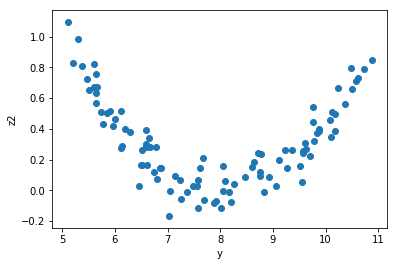

In [91]:
noise = np.random.normal(0,0.1,100)    #hier maak ik een random variabele met mean 0 en een standard deviation van 0.1 zodat de grafiek vorm nog zichtbaar is.
z2 = df['z'] + noise                   #hier tel ik de noise bij de waardes van z op
scatterplot = plt.scatter(df['y'],z2) #hier maak ik een scatterplot waar ik y tegen z2 uit zet
plt.xlabel('y')                            #hier geef ik een naam aan de x as
plt.ylabel('z2')                            #hier geef ik een naam aan de y as
plt.show()    

## Github

After you have finished, we need to upload this notebook on github.

Instructions on how to upload this on github can be found [on this page](http://janboone.github.io/programming-for-economists/github.html). This page has two screencasts: one shows how to drag the notebook onto your github page, the other shows how you can use the command line to upload your notebook.


Remember to update the README file in your repository to include a link to this notebook on github.


The links that you should post start with “github.com/” and are NOT of the form “http://localhost”. Make sure you test your links after uploading.